## GPU
### TESLA V100 PER MARCONI CINECA

0      preloop
1    full_loop
2         iter
3      weights
4      doppler
5      tfgraph
6    houghcand
7     finalize
Name: nome, dtype: object
[ 6.39501989 11.48893154  6.26352561  5.2367382 ] [ 6.39501989 11.48893154  6.26352561  5.2367382 ]


<IPython.core.display.Javascript object>


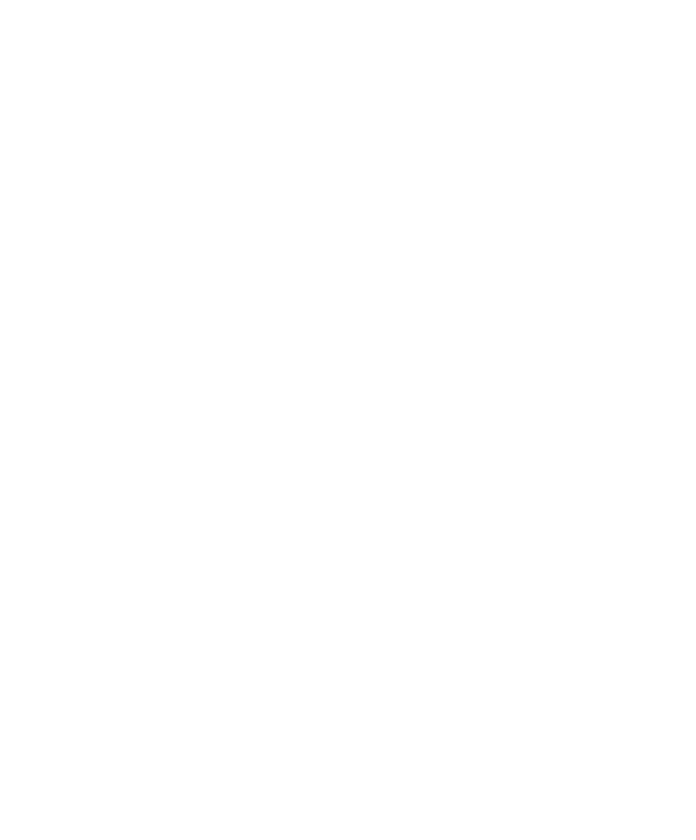

nome  in_O3LH_01_0079_.mat  in_O3LH_02_0322_.mat  \
0    preloop              1.956976              5.647831   
1  full_loop            284.967819            479.399592   
2       iter              6.425512             11.411400   
3    weights              0.483170              2.673916   
4    doppler              0.090218              0.392967   
5    tfgraph              1.464381              1.887713   
6  houghcand              4.386688              6.453441   
7   finalize              0.001055              0.003362   

   in_O3LH_03_0764_.mat  in_O3LH_04_1533_.mat  in_O3LL_01_0079_.mat  \
0              6.531194              9.458090              1.809860   
1            263.751721            221.047322            272.845829   
2              6.206954              5.168582              6.364528   
3              2.606387              2.867123              0.487870   
4              0.445816              0.662324              0.090173   
5              0.675494              0.407866              1.445110   
6              2.477073              1.229067              4.340294   
7              0.002184              0.002201              0.001080   

   in_O3LL_02_0322_.mat  in_O3LL_03_0764_.mat  in_O3LL_04_1533_.mat  
0              5.735978              6.609065              9.441602  
1            486.277512            270.101055            224.367893  
2             11.566463              6.320097              5.304895  
3              2.777769              2.699729              2.964060  
4              0.392258              0.449506              0.676381  
5              1.887041              0.674606              0.406840  
6              6.506729              2.493484              1.254895  
7              0.002666              0.002772              0.002718

In [1]:
%matplotlib notebook
import pandas
import numpy
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 15
home = "/m100/home/userexternal/ilarosa0/"
datagpu = pandas.read_csv(home + "thesis/codici/gputimes.csv")

print(datagpu["nome"])

LH01 = numpy.array(datagpu["in_O3LH_01_0079_.mat"])
LL01 = numpy.array(datagpu["in_O3LL_01_0079_.mat"])
tempi8 = (LH01+LL01)/2

LH02 = numpy.array(datagpu["in_O3LH_02_0322_.mat"])
LL02 = numpy.array(datagpu["in_O3LL_02_0322_.mat"])
tempi4 = (LH02+LL02)/2

LH03 = numpy.array(datagpu["in_O3LH_03_0764_.mat"])
LL03 = numpy.array(datagpu["in_O3LL_03_0764_.mat"])
tempi2 = (LH03+LL03)/2

LH04 = numpy.array(datagpu["in_O3LH_04_1533_.mat"])
LL04 = numpy.array(datagpu["in_O3LL_04_1533_.mat"])
tempi1 = (LH04+LL04)/2


tempi = numpy.stack([tempi8, tempi4, tempi2, tempi1], axis = 1)
#print(tempi)
N = 4


ind = numpy.arange(N)# the x locations for the groups
width = 0.485       # the width of the bars: can also be len(x) sequence

#bar1disp = load[[0,2,4,6]]
#bar1pari = load[[1,3,5,7]]
preloop = tempi[0]
full_loop = tempi[1]
iterazione = tempi[2]
weights = tempi[3]
doppler = tempi[4]
tfgraph = tempi[5]
houghcand = tempi[6]
finalize = tempi[7]

tempopreGPU = preloop
tempoiterGPU = iterazione
print(iterazione, tempoiterGPU)

palette = ['grey','C0','blue', 'C1', 'C3', 'black'] 
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(5.8,7))
cm = plt.get_cmap('seismic')

p1 = plt.bar(ind, preloop, width, align = 'center', color = palette[0], label = "Loop preparation")
p2 = plt.bar(ind, weights, width, bottom = preloop, align = 'center',color = palette[2], label = 'Peakmap weights')
p3 = plt.bar(ind, doppler, width, bottom = preloop+weights, align = 'center',color = palette[1],label = 'Doppler correction')
p4 = plt.bar(ind, tfgraph, width, bottom = preloop+weights+doppler, align = 'center',color = palette[3], label = 'TensorFlow graph')
p5 = plt.bar(ind, houghcand, width, bottom = preloop+weights+doppler+tfgraph, align = 'center',color = palette[4], label = 'Hough + candidates')
#p6 = #plt.bar(ind, finalize, width, bottom = preloop+weights+doppler+tfgraph+houghcand, align = 'center',color = palette[5])
#pover = plt.bar(ind, finalize, width, align = 'center',color = cm, alpha = 0.8, label = 'Loop iteration')

plt.ylabel('Time (s)', fontsize = 14)
#plt.yscale('log')
plt.title('Benchmarks with GPU: NVIDIA V100',fontsize = 16)
plt.xticks([0,1,2,3,4], ('$T_{FFT} = 8192 s$ (1 Hz)',
                '$T_{FFT} = 4096 s$',
    '$T_{FFT} = 2048 s$',
    '$T_{FFT} = 1024 s$'), rotation='vertical')
plt.legend(loc="lower right")
#plt.legend((p1[0], p2[0], p3[0], p4[0],p5[0],p6[0],pover[0]),
#           ('Loop preparation','Peakmap weights', 'Doppler correction', 'TensorFlow graph', 'Hough + candidates', 'Loop iteration' ))
plt.grid(color = '#474747',linestyle='--', linewidth=1, axis = 'y')
plt.tight_layout()
plt.savefig("/m100/home/userexternal/ilarosa0/benchGPU.pdf", format='pdf')
plt.savefig("/m100/home/userexternal/ilarosa0/benchGPU.svg", format='svg')
plt.show()



datagpu

In [159]:
224/41

5.463414634146342

[268.1808285 647.7707165 278.1873025 126.0709535] [268.1808285 647.7707165 278.1873025 126.0709535]


<IPython.core.display.Javascript object>


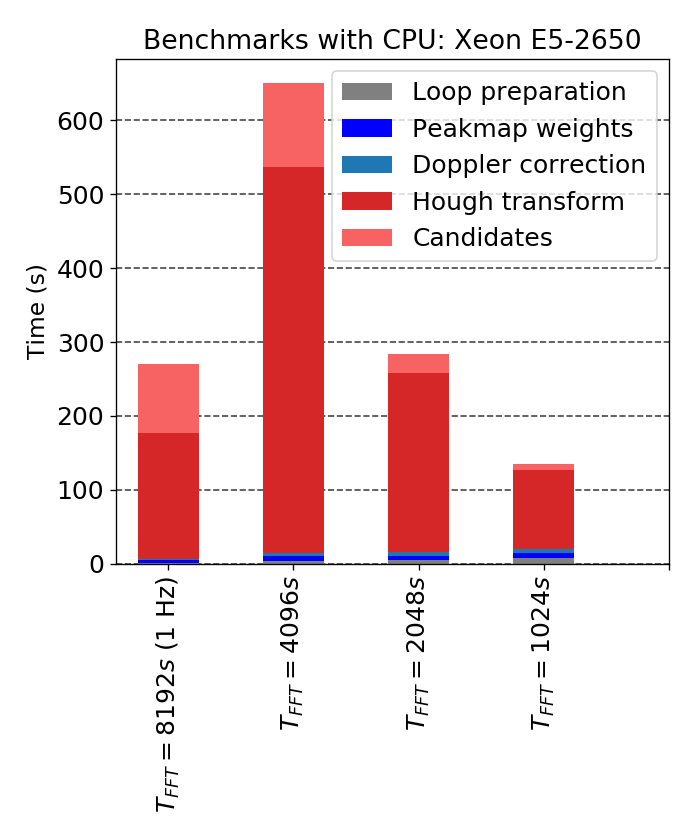

nome  in_O3LH_01_0079_.mat  in_O3LH_02_0322_.mat  \
0    preloop              1.532258              3.633659   
1  tempoIter            191.217410            541.789238   
2     weight              2.991679              7.298775   
3       dopp              0.766385              4.198637   
4  prephough              0.102934              0.685703   
5      hough            164.381213            500.430734   
6       cand             22.975199             29.175389   

   in_O3LH_03_0764_.mat  in_O3LH_04_1533_.mat  in_O3LL_01_0079_.mat  \
0              5.138319              8.579608              1.504020   
1            255.025281            118.098505            205.576558   
2              5.477622              5.698973              3.974355   
3              4.670942              5.019094              1.221519   
4              0.751451              0.782289              0.103673   
5            237.194615            104.825867            176.729647   
6              6.930651              1.772282             23.547364   

   in_O3LL_02_0322_.mat  in_O3LL_03_0764_.mat  in_O3LL_04_1533_.mat  
0              3.199922              4.874182              7.892781  
1            581.511908            263.160929            123.344730  
2              5.640043              5.631535              5.585001  
3              4.523501              4.985261              5.698469  
4              0.710936              0.792962              0.837802  
5            542.399388            245.952357            109.429516  
6             28.238040              5.798814              1.793942

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib notebook
home = "/m100/home/userexternal/ilarosa0/"
datacpu = pandas.read_csv(home + "thesis/codici/cputimes.csv")

LH01 = numpy.array(datacpu["in_O3LH_01_0079_.mat"])
LL01 = numpy.array(datacpu["in_O3LL_01_0079_.mat"])
tempi8 = (LH01+LL01)/2

LH02 = numpy.array(datacpu["in_O3LH_02_0322_.mat"])
LL02 = numpy.array(datacpu["in_O3LL_02_0322_.mat"])
tempi4 = (LH02+LL02)/2

LH03 = numpy.array(datacpu["in_O3LH_03_0764_.mat"])
LL03 = numpy.array(datacpu["in_O3LL_03_0764_.mat"])
tempi2 = (LH03+LL03)/2

LH04 = numpy.array(datacpu["in_O3LH_04_1533_.mat"])
LL04 = numpy.array(datacpu["in_O3LL_04_1533_.mat"])
tempi1 = (LH04+LL04)/2


tempi = numpy.stack([tempi8, tempi4, tempi2, tempi1], axis = 1)
#print(tempi)


#print(tempi)
#datacpu


import numpy
N = 4


ind = np.arange(N)# the x locations for the groups
width = 0.485       # the width of the bars: can also be len(x) sequence

#bar1disp = load[[0,2,4,6]]
#bar1pari = load[[1,3,5,7]]
preloop = tempi[0]
iterazione = tempi[1]+tempi[6]*3
weights = tempi[2]
doppler = tempi[3]
hough = tempi[4]+tempi[5]
cand = tempi[6]*4

tempopreCPU = preloop
tempoiterCPU = weights+doppler+hough+cand
print(iterazione, tempoiterCPU)


mpl.rcParams['font.size'] = 15
palette = ['grey','C0','blue', 'C1', 'C3', 'black'] 
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(5.8,7))
cm = plt.get_cmap('seismic')

p1 = plt.bar(ind, preloop, width, align = 'center', color = palette[0], label = "Loop preparation")
p2 = plt.bar(ind, weights, width, bottom = preloop, align = 'center',color = palette[2], label = 'Peakmap weights')
p3 = plt.bar(ind, doppler, width, bottom = preloop+weights, align = 'center',color = palette[1],label = 'Doppler correction')
p4 = plt.bar(ind, hough, width, bottom = preloop+weights+doppler, align = 'center',color = palette[4], label = 'Hough transform')
p5 = plt.bar(ind, cand, width, bottom = preloop+weights+doppler+hough, align = 'center',color = '#f76262', label = 'Candidates')
#p6 = #plt.bar(ind, finalize, width, bottom = preloop+weights+doppler+tfgraph+houghcand, align = 'center',color = palette[5])
#pover = plt.bar(ind, finalize, width, align = 'center',color = cm, alpha = 0.8, label = 'Loop iteration')

plt.ylabel('Time (s)', fontsize = 14)
#plt.yscale('log')
plt.title('Benchmarks with CPU: Xeon E5-2650',fontsize = 16)
plt.xticks([0,1,2,3,4], ('$T_{FFT} = 8192 s$ (1 Hz)',
                '$T_{FFT} = 4096 s$',
    '$T_{FFT} = 2048 s$',
    '$T_{FFT} = 1024 s$'), rotation='vertical')
plt.legend()
#plt.legend((p1[0], p2[0], p3[0], p4[0],p5[0],p6[0],pover[0]),
#           ('Loop preparation','Peakmap weights', 'Doppler correction', 'TensorFlow graph', 'Hough + candidates', 'Loop iteration' ))
plt.grid(color = '#474747',linestyle='--', linewidth=1, axis = 'y')
plt.tight_layout()
plt.savefig("/m100/home/userexternal/ilarosa0/benchCPU.pdf", format='pdf')
plt.savefig("/m100/home/userexternal/ilarosa0/benchCPU.svg", format='svg')
plt.show()


datacpu

In [4]:
import glob
import os
import numpy
import scipy.io
from GridGen import make_skygrid

freq8 = numpy.loadtxt("/m100/home/userexternal/ilarosa0/inputs/listaH256Hz.txt", dtype = str)
freq4 = numpy.loadtxt("/m100/home/userexternal/ilarosa0/inputs/listaH1024Hz.txt", dtype = str)
freq2 = numpy.loadtxt("/m100/home/userexternal/ilarosa0/inputs/listaH2048Hz.txt", dtype = str)
freq1 = numpy.loadtxt("/m100/home/userexternal/ilarosa0/inputs/listaH4096Hz.txt", dtype = str)

nfiles8 = freq8.size
nfiles4 = freq4.size
nfiles2 = freq2.size
nfiles1 = freq1.size

print(nfiles8,nfiles4, nfiles2, nfiles1)

for i in numpy.arange(freq8.size):
    freq8[i] = numpy.int(freq8[i][106:110])

freq8 = freq8.astype(int)

for i in numpy.arange(freq4.size):
    freq4[i] = numpy.int(freq4[i][107:111])

freq4 = freq4.astype(int)

for i in numpy.arange(freq2.size):
    freq2[i] = numpy.int(freq2[i][107:111])

freq2 = freq2.astype(int)

for i in numpy.arange(freq1.size):
    freq1[i] = numpy.int(freq1[i][107:111])

freq1 = freq1.astype(int)


def comp_sizes(freqarray, tfft, peakwidth):
    npoints = numpy.zeros(freqarray.size)
    for i in numpy.arange(freqarray.size):
        PAR = {'freqFinal': freqarray[i]+peakwidth,
               'tFft'     : tfft}
        [eclCoord, rectCoord, eqCoord] = make_skygrid(PAR)
        npoints[i] = eclCoord.shape[0]
    return npoints
    
npoints1 = comp_sizes(freq1, 1024, 5)
npoints2 = comp_sizes(freq2, 2048, 5)
npoints4 = comp_sizes(freq4, 4096, 5)
npoints8 = comp_sizes(freq8, 8192, 1)





118 77 103 205


<IPython.core.display.Javascript object>


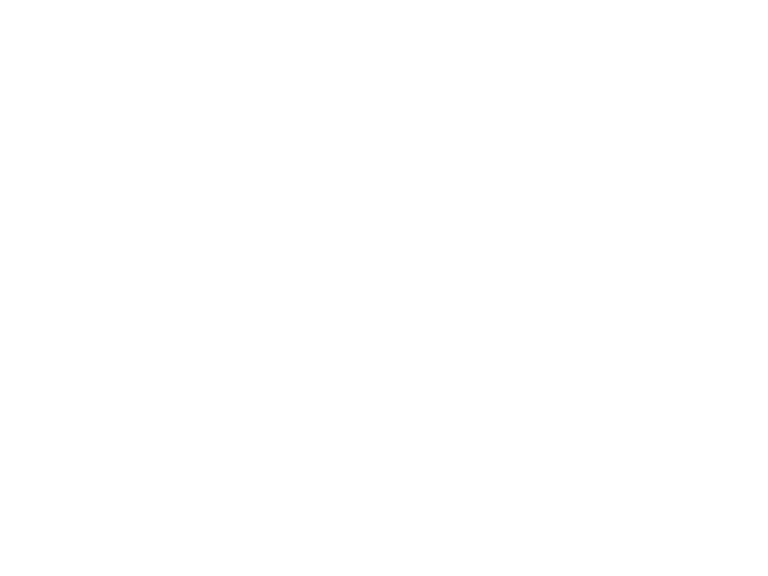

128 132


In [5]:
from matplotlib import pyplot
%matplotlib notebook
mpl.rcParams['font.size'] = 13
pyplot.rc('axes', axisbelow=True)
pyplot.title('Number of sky points as a function of frequency')
p8 = pyplot.plot(freq8+1, npoints8/1000, linewidth = 3, label = "$T_{FFT} = 8192 s$")
p4 = pyplot.plot(freq4+5, npoints4/1000, linewidth = 3, label = "$T_{FFT} = 4096 s$")
p2 = pyplot.plot(freq2+5, npoints2/1000, linewidth = 3, label = "$T_{FFT} = 2048 s$")
p1 = pyplot.plot(freq1+5, npoints1/1000, linewidth = 3, label = "$T_{FFT} = 1024 s$")

print(freq8[-1]+1,freq4[0]+5)
#pyplot.xticks(numpy.arange(0,500,100),numpy.arange(10, 2048, 502))
pyplot.xlabel('Frequency (Hz)')
pyplot.ylabel('Number of points ($\\times 10^{3}$)')
pyplot.legend()
pyplot.grid(linestyle='--', linewidth=1)
pyplot.savefig("/m100/home/userexternal/ilarosa0/numpoints.pdf", format='pdf')
pyplot.savefig("/m100/home/userexternal/ilarosa0/numpoints.svg", format='svg')
pyplot.show()

<IPython.core.display.Javascript object>


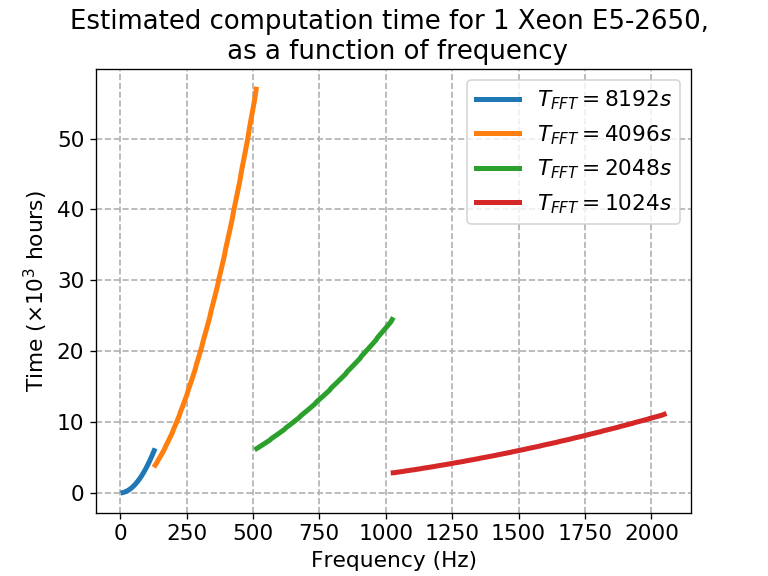

In [13]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot
mpl.rcParams['font.size'] = 13
tempofile8 = tempopreCPU[0]+tempoiterCPU[0]*npoints8
tempofile4 = tempopreCPU[1]+tempoiterCPU[1]*npoints4
tempofile2 = tempopreCPU[2]+tempoiterCPU[2]*npoints2
tempofile1 = tempopreCPU[3]+tempoiterCPU[3]*npoints1

#print((numpytempofile8+tempofile4+tempofile2+tempofile1)*1e-3/3600)

pyplot.plot(freq8+1, tempofile8*1e-3/3600 , label = "$T_{FFT} = 8192 s$", linewidth = 3)
pyplot.plot(freq4+5, tempofile4*1e-3/3600, label = "$T_{FFT} = 4096 s$", linewidth = 3)
pyplot.plot(freq2+5, tempofile2*1e-3/3600 , label = "$T_{FFT} = 2048 s$", linewidth = 3)
pyplot.plot(freq1+5, tempofile1*1e-3/3600 , label = "$T_{FFT} = 1024 s$", linewidth = 3)
pyplot.ylabel('Time ($\\times 10^3$ hours)')  # we already handled the x-label with ax1
pyplot.xlabel('Frequency (Hz)')
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
pyplot.grid(linestyle='--', linewidth=1)
pyplot.title("Estimated computation time for 1 Xeon E5-2650, \n as a function of frequency")
pyplot.legend()
plt.savefig("/m100/home/userexternal/ilarosa0/timeperfCPU.svg")
plt.savefig("/m100/home/userexternal/ilarosa0/timeperfCPU.pdf")
pyplot.show()

5.016445505123644


<IPython.core.display.Javascript object>


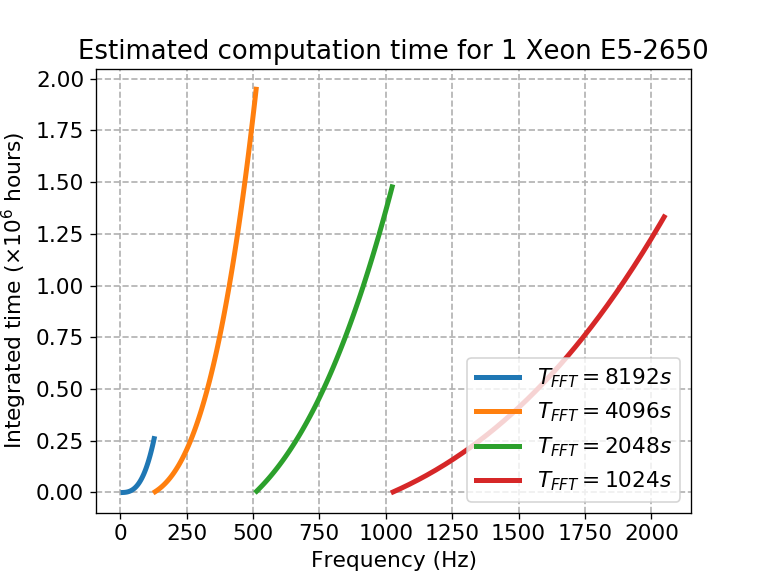

In [14]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot
mpl.rcParams['font.size'] = 13

tempoint8 = numpy.cumsum(tempofile8)+tempopreCPU[0]*nfiles8
tempoint4 = numpy.cumsum(tempofile4)+tempopreCPU[1]*nfiles4
tempoint2 = numpy.cumsum(tempofile2)+tempopreCPU[2]*nfiles2
tempoint1 = numpy.cumsum(tempofile1)+tempopreCPU[3]*nfiles1

print((tempoint8[-1]+tempoint4[-1]+tempoint2[-1]+tempoint1[-1])*1e-6/3600)

pyplot.plot(freq8+1, tempoint8*1e-6/3600 , label = "$T_{FFT} = 8192 s$", linewidth = 3)
pyplot.plot(freq4+5, tempoint4*1e-6/3600, label = "$T_{FFT} = 4096 s$", linewidth = 3)
pyplot.plot(freq2+5, tempoint2*1e-6/3600 , label = "$T_{FFT} = 2048 s$", linewidth = 3)
pyplot.plot(freq1+5, tempoint1*1e-6/3600 , label = "$T_{FFT} = 1024 s$", linewidth = 3)

pyplot.ylabel('Integrated time ($\\times 10^6$ hours)')  # we already handled the x-label with ax1
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
pyplot.grid(linestyle='--', linewidth=1)
pyplot.xlabel('Frequency (Hz)')
pyplot.title("Estimated computation time for 1 Xeon E5-2650")
pyplot.legend(loc = "lower right")
plt.savefig("/m100/home/userexternal/ilarosa0/inttimeCPU.svg")
plt.savefig("/m100/home/userexternal/ilarosa0/inttimeCPU.pdf")
pyplot.show()

<IPython.core.display.Javascript object>


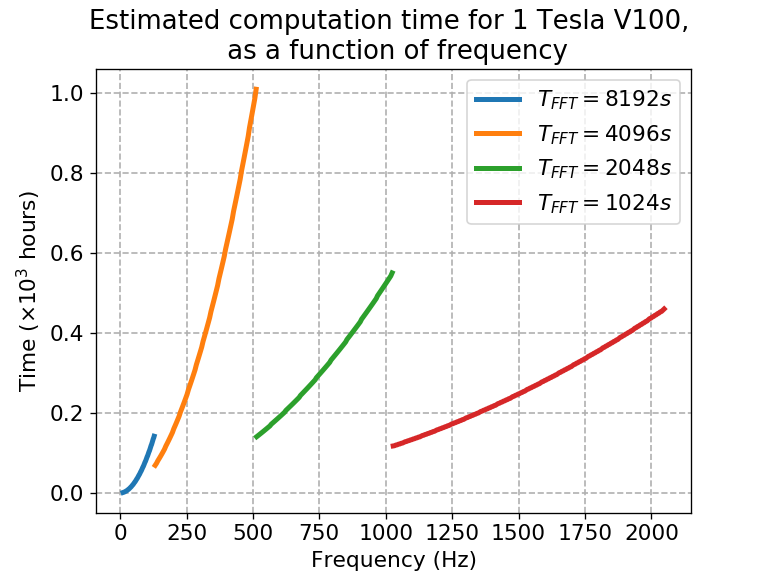

In [15]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot
mpl.rcParams['font.size'] = 13
tempofile8 = tempopreGPU[0]+tempoiterGPU[0]*npoints8
tempofile4 = tempopreGPU[1]+tempoiterGPU[1]*npoints4
tempofile2 = tempopreGPU[2]+tempoiterGPU[2]*npoints2
tempofile1 = tempopreGPU[3]+tempoiterGPU[3]*npoints1


pyplot.plot(freq8+1, tempofile8*1e-3/3600 , label = "$T_{FFT} = 8192 s$", linewidth = 3)
pyplot.plot(freq4+5, tempofile4*1e-3/3600, label = "$T_{FFT} = 4096 s$", linewidth = 3)
pyplot.plot(freq2+5, tempofile2*1e-3/3600 , label = "$T_{FFT} = 2048 s$", linewidth = 3)
pyplot.plot(freq1+5, tempofile1*1e-3/3600 , label = "$T_{FFT} = 1024 s$", linewidth = 3)
pyplot.ylabel('Time ($\\times 10^3$ hours)')  # we already handled the x-label with ax1
pyplot.xlabel('Frequency (Hz)')
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
pyplot.grid(linestyle='--', linewidth=1)
pyplot.title("Estimated computation time for 1 Tesla V100, \n as a function of frequency")
pyplot.legend()
plt.savefig("/m100/home/userexternal/ilarosa0/timeperfGPU.svg")
plt.savefig("/m100/home/userexternal/ilarosa0/timeperfGPU.pdf")
pyplot.show()

0.12931146721598163


<IPython.core.display.Javascript object>


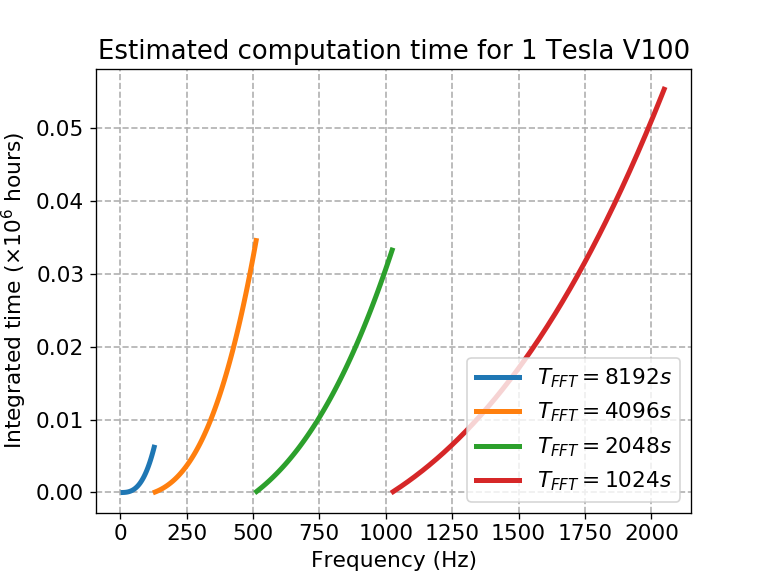

In [16]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot

mpl.rcParams['font.size'] = 13
tempoint8 = numpy.cumsum(tempofile8)+tempopreGPU[0]*nfiles8
tempoint4 = numpy.cumsum(tempofile4)+tempopreGPU[1]*nfiles4
tempoint2 = numpy.cumsum(tempofile2)+tempopreGPU[2]*nfiles2
tempoint1 = numpy.cumsum(tempofile1)+tempopreGPU[3]*nfiles1

print((tempoint8[-1]+tempoint4[-1]+tempoint2[-1]+tempoint1[-1])*1e-6/3600)

pyplot.plot(freq8+1, tempoint8*1e-6/3600 , label = "$T_{FFT} = 8192 s$", linewidth = 3)
pyplot.plot(freq4+5, tempoint4*1e-6/3600, label = "$T_{FFT} = 4096 s$", linewidth = 3)
pyplot.plot(freq2+5, tempoint2*1e-6/3600 , label = "$T_{FFT} = 2048 s$", linewidth = 3)
pyplot.plot(freq1+5, tempoint1*1e-6/3600 , label = "$T_{FFT} = 1024 s$", linewidth = 3)

pyplot.ylabel('Integrated time ($\\times 10^6$ hours)')  # we already handled the x-label with ax1
pyplot.xlabel('Frequency (Hz)')
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
pyplot.grid(linestyle='--', linewidth=1)
pyplot.title("Estimated computation time for 1 Tesla V100")
pyplot.legend(loc = "lower right")
plt.savefig("/m100/home/userexternal/ilarosa0/inttimeGPU.svg")
plt.savefig("/m100/home/userexternal/ilarosa0/inttimeGPU.pdf")
pyplot.show()

In [2]:
import scipy.io
import numpy
from Inputs import loadData
from PAR import parDefs

def spinbins(dataPath):
    struct = scipy.io.loadmat(dataPath)['job_pack_0']
    PAR = parDefs(struct)
    # manage data
    [firstFreq, peakmap, spindowns, velocities, indices] = loadData(struct, PAR)
    return(spindowns.size)


bins8 = spinbins('/m100_work/INF20_virgo_1/ilarosa0/data/in_O3LH_01_0079_.mat')
bins4 = spinbins('/m100_work/INF20_virgo_1/ilarosa0/data/in_O3LH_02_0322_.mat') 
bins2 = spinbins('/m100_work/INF20_virgo_1/ilarosa0/data/in_O3LH_03_0764_.mat') 
bins1 = spinbins('/m100_work/INF20_virgo_1/ilarosa0/data/in_O3LH_04_1533_.mat') 

print(bins8, bins4, bins2, bins1)

2566 1284 644 322
